In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
#from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#EDA--
#data analysis-- shape, info(), describe(), dtypes, corr()
#missing value analysis
#outlier analysis
#visualization--

#supervised model building part-- classification model
#independt and depednt data
#divide the data into train and test set
#create your model
#train your model
#test your model-- predict()
#performance of the model-- accuracy score, confusion matrix, classification_report

In [7]:
df = pd.read_csv(r'C:\Users\Admin\Sessions\heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.shape

(303, 14)

The idea behind the entropy is, in simplified terms, the following: 
Imagine you have a lottery wheel which includes 100 green balls. 
The set of balls within the lottery wheel can be said to be totally pure because only green balls are included. 
To express this in the terminology of entropy, this set of balls has a entropy of 0 (we can also say zero impurity). 
Consider now, 30 of these balls are replaced by red and 20 by blue balls.


If you now draw another ball from the lottery wheel, 
the probability of receiving a green ball has dropped from 1.0 to 0.5. 
Since the impurity increased, the purity decreased, hence also the entropy increased. 
Hence we can say, the more "impure" a dataset, the higher the entropy and the less "impure" a dataset, the lower the entropy. 

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#col-- object--- fill the nan values by the mode of the col
#col-- num-- fill the nan values by mean/median

In [ ]:
# 20, 30,25, 79,10,2, 70, (50-60), 80, 2

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [12]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [15]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [16]:
df[df['chol']>300].shape

(43, 14)

In [17]:
df[(df['chol']>300) & (df['age']>40)].shape

(42, 14)

In [18]:
df[df['chol']>300].count()

age         43
sex         43
cp          43
trestbps    43
chol        43
fbs         43
restecg     43
thalach     43
exang       43
oldpeak     43
slope       43
ca          43
thal        43
target      43
dtype: int64

In [19]:
f=df[df['thal']==2]
f

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,61,1,0,138,166,0,0,125,1,3.6,1,1,2,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0


In [20]:
f[f['target']==1].shape

(130, 14)

In [21]:
df.shape

(303, 14)

In [22]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [23]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [25]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#left skewed data-- mean, median, mode

In [ ]:
#right skewed data-- mode, median, mean

Text(0.5, 1.0, 'Age distribuition')

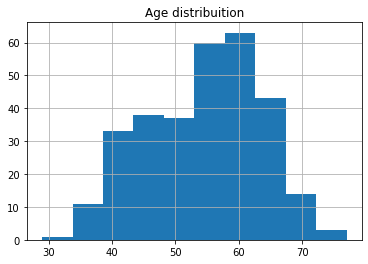

In [24]:
df['age'].hist(grid=True, bins=10) 
plt.title('Age distribuition')

In the above graph, we can analyse the distribution of Age column, and we can say that there are 60+ people who are having age between 57 to 63.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


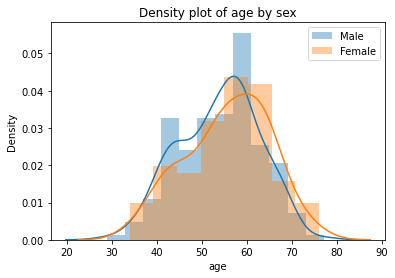

In [26]:
sns.distplot(df[df['sex']==1]['age'],  label='Male')
sns.distplot(df[df['sex']==0]['age'], label='Female')
plt.legend()
plt.title('Density plot of age by sex')
plt.show()

Density graph shows the smoothed distribution of points along the numerical axis. The density peaks where there is the highest concentration of points. In sum, density graphs can be considered smoothed histograms.

Text(0.5, 1.0, 'Resting Blood pressure distribuition')

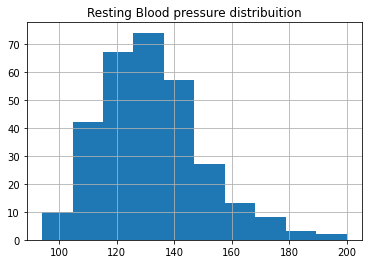

In [27]:
df['trestbps'].hist()
plt.title('Resting Blood pressure distribuition')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


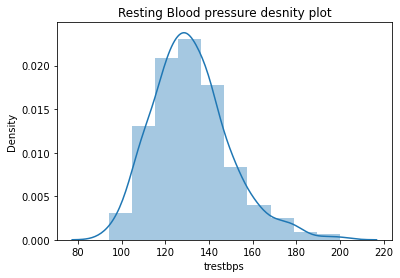

In [28]:
sns.distplot(df['trestbps'], bins=10)
plt.title('Resting Blood pressure desnity plot');

In the above graph, we are having a normal distribution 

<AxesSubplot:>

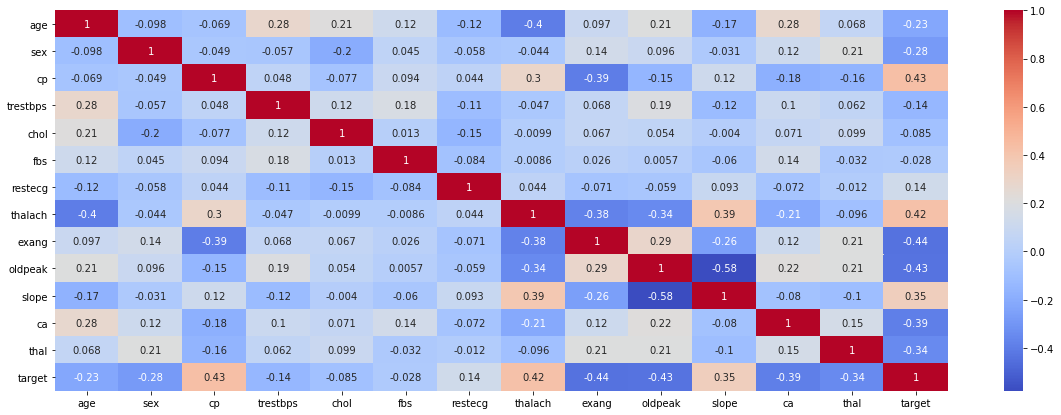

In [33]:
plt.rcParams['figure.figsize'] = (20,7)
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

<AxesSubplot:xlabel='oldpeak'>

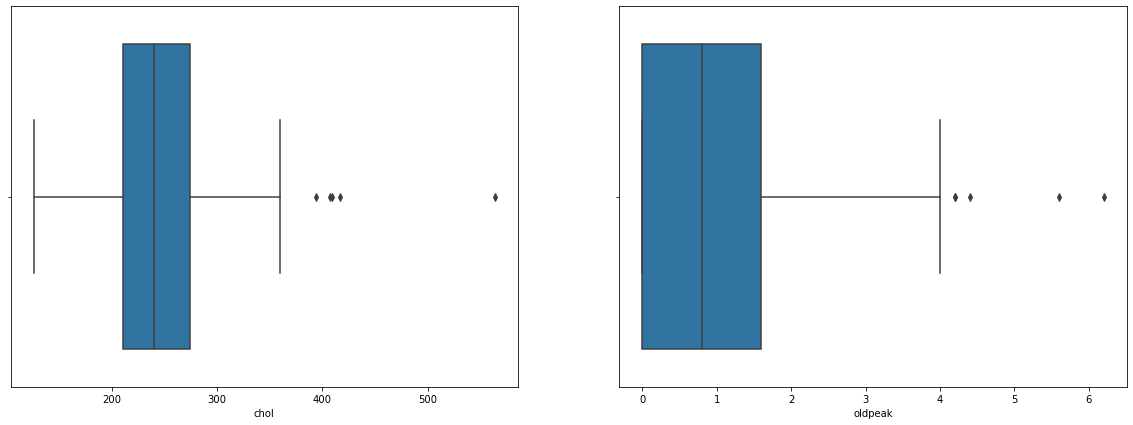

In [34]:
fig, axes = plt.subplots(nrows = 1, ncols=2)
sns.boxplot(x='chol', data=df, ax=axes[0])
sns.boxplot(x='oldpeak', data=df, ax=axes[1])

In [ ]:
#age gender target
#20   M      1
#90         0-- outlier
#     F      1

In [ ]:
# data>=q1-1.5*IQR or data<=q3+1.5*IRQ

In [ ]:
#iqr method of handing outliers
#lower limit-- q1-1.5*IQR
#upper limit-- q3+1.5*IQR

In [ ]:

#upper limit-- mean+3*sd
#lower limit-- mean-3*sd

Text(0.5, 1.0, 'Count of target feature by sex')

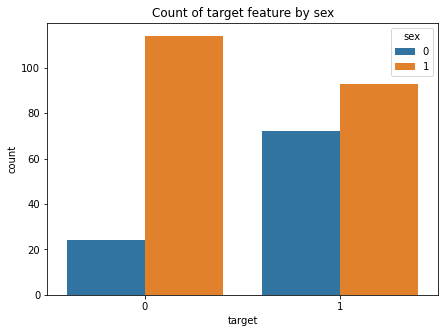

In [35]:
plt.rcParams['figure.figsize'] = (7,5)
sns.countplot(x='target', hue='sex', data=df);
plt.title('Count of target feature by sex')

The amount of healthy male people is greater than the amount of unhealthy. For women, the number of unhealthy women is higher.

In [ ]:
df.head()

In [ ]:
#supervised model building part-- classification model
#independt and depednt data
#divide the data into train and test set
#create your model
#train your model
#test your model-- predict()
#performance of the model-- accuracy score, confusion matrix, classification_report

In [ ]:
#df.drop(columns=['target'])
#if you want to take only age value as your independent data
pd.DataFrame(df['age'])

In [36]:
X = df.iloc[:, :-1]#independent variable should always be in a dataframe fromat(2D) data
y = df['target']#dependent or target value
print(X.shape)
print(y.shape)

(303, 13)
(303,)


In [ ]:
#x=100
#y=100

In [ ]:
#df
#age  cp  gender trestbps target
#20    200  0      1       1
#89    300  1      0        0


In [ ]:
#x_train-- remaining 70% of x 
#y_train-- remaining 70% of y
#x_test-- 30%of x== 30 records from the df and store those values in x_test
#y_test-- 30%of y== 30 records from the df and store those values in y_test

In [51]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=30, test_size=0.3)
print(x_train.shape)
print(x_test.shape)

(212, 13)
(91, 13)


In [52]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3
224,54,1,0,110,239,0,1,126,1,2.8,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,70,1,1,156,245,0,0,143,0,0.0,2,0,2
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [56]:
y_train

6      1
139    1
28     1
37     1
224    0
      ..
145    1
251    0
140    1
301    0
293    0
Name: target, Length: 212, dtype: int64

In [ ]:
#DecisionTreeRegressor-- work with regression problem

In [57]:
clf = tree.DecisionTreeClassifier() #we are creating a decision tree model which is untrained
clf.fit(x_train,y_train) # training the model

#testing the model--
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [58]:
y_train_pred

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0], dtype=int64)

In [59]:
y_test_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1], dtype=int64)

In [60]:
y_test

97     1
122    1
84     1
231    0
110    1
      ..
48     1
24     1
178    0
41     1
23     1
Name: target, Length: 91, dtype: int64

In [61]:
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 1.0
Test score 0.7252747252747253


In [62]:
accuracy_score(y_test_pred,y_test)

0.7252747252747253

In [65]:
# helper function
def plot_confusionmatrix(predict,actual,label):
    print(f'{label} Confusion matrix')
    cf = confusion_matrix(predict,actual)
    sns.heatmap(cf,annot=True,fmt='G' )
    plt.show()

Train Confusion matrix


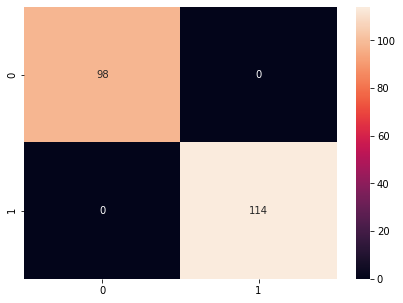

In [66]:
plot_confusionmatrix(y_train_pred,y_train,'Train')

Test Confusion matrix


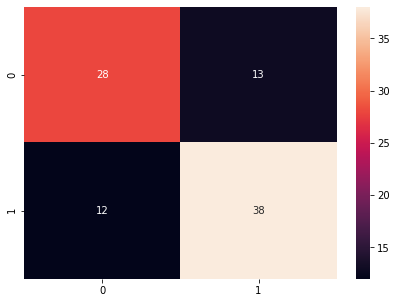

In [67]:
plot_confusionmatrix(y_test_pred,y_test,'Test')

In [63]:
confusion_matrix(y_test_pred,y_test)

array([[28, 13],
       [12, 38]], dtype=int64)

In [ ]:
(Tp+TN)/(TP+TN+FP+FN)


In [ ]:
#               Acutal Values
#Predicted        1   0
#             1  TP  FP
#             0  FN  TN 

In [68]:
c_parameter_name = 'max_depth'
c_parameter_values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
df1 = pd.DataFrame(columns=['max_depth', 'accuracy'])
df1

,max_depth,accuracy


In [ ]:
#for the 1st loop, input_parameter will 1
#inside the for loop, it will create a dt model with 1 as the max depth vallue:
#model = tree.DecisionTreeClassifier(max_depth=1)

In [70]:
for input_parameter in c_parameter_values:
    model = tree.DecisionTreeClassifier(max_depth=input_parameter)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test,y_pred)*100
    df1= df1.append({'max_depth' : input_parameter , 'accuracy' : acc_score}, ignore_index=True) 
df1

,max_depth,accuracy
0,1.0,79.120879
1,2.0,76.923077
2,3.0,74.725275
3,4.0,70.329670
4,5.0,74.725275
5,6.0,75.824176
6,7.0,73.626374
7,8.0,74.725275
8,9.0,71.428571
9,10.0,74.725275


In [71]:
model = tree.DecisionTreeClassifier(max_depth=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)*100

In [72]:
acc_score

79.12087912087912

In [73]:
from sklearn.metrics import classification_report

In [74]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76        39
           1       0.82      0.81      0.82        52

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



In [ ]:
#recall->tp / (tp + fn)
#The recall is the measure of our model correctly identifying True Positives. 
#Thus, for all the people who actually have heart disease, 
#recall tells us how many were correctly identified as a heart patient.
#Layman definition: Of all the actual positive examples out there, 
#how many of them did I correctly predict to be positive?

#precision of class 0 = TP of class 0/total number of object 
#What is the Precision for our model? 
#Yes, it is 0.843 or, when it predicts that a patient has heart disease, it is correct around 84% of the time.
#precision of class 1 = TP of class 1/total number of object 
#Layman definition: Of all the positive predictions I made, how many of them are truly positive?


#macro average = (precision of class 0 + precision of class 1)/2 

#weighted average is precision of all classes merge together
#weighted average = (TP of class 0 + TP of class 1)/(total number of class 0 + total number of class 1) 

#F1-score is a measure of a model's accuracy on a dataset
#a good F1 score means that you have low false positives and low false negatives, 
#Accuracy is used when the True Positives and True negatives are more important while 
#F1-score is used when the False Negatives and False Positives are crucial.
#Support is the number of actual occurrences of the class in the specified dataset.

# Accuracy tells you how many times the ML model was correct overall. 
# Precision is how good the model is at predicting a specific category. 
# Recall tells you how many times the model was able to detect a specific category.